In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [1]:
import numpy as np

# Infinite Perimeter

## Question 

We have a rectangle with an area of $16m^2$, express the the perimeter of the rectangle as a function of one side.

## Observation

If the rectangle has an area of $16m^2$ we know that for some width and height we have $w\cdot h=16m^2$.

* $4m \cdot 4m = 16m^2$
* $8m \cdot 2m = 16m^2$
* $16m \cdot 1m = 16m^2$

The formula for the perimeter is $2(w+h)$.

If we have a given side $L_1$, we can find the missing side $L_2 = \dfrac{16m}{L_1}$, because $L_1 \cdot L_2 = 16m^2$.

## Formula

Putting everything together we get: 

$$\begin{align}P &= 2(L_1 + L_2) \\ &= 2\left(L_1 + \frac{16m}{L_1}\right) \\ &= 2L_1 + 2\frac{16m}{L_1} \\ &= \frac{2L_1^2+32}{L_1} \end{align}$$

This gives the function for the perimeter of the rectangle for any side $L$:

$$P(L)=\frac{2L^2+32}{L}$$

where $L \not= 0$.

In [4]:
def P(L):
    return (2*L**2+32)/L

If we try this for the sides we specified above we will see:

In [82]:
print("Perimeter 4*4: %i" % (2*(4+4)))
print("Perimeter 2*8: %i" % (2*(2+8)))
print("Perimeter 1*16: %i" % (2*(1+16)))

Perimeter 4*4: 16
Perimeter 2*8: 20
Perimeter 1*16: 34


We can give either of the sides, because $P(2)=P(8)=20$, etc. Also notice that this function is not injective or surjective.

In [81]:
P(4)

16.0

In [20]:
P(8)

20.0

In [21]:
P(2)

20.0

In [22]:
P(16)

34.0

In [23]:
P(1)

34.0

These results shows us that our expectation is correct.

## Plot

Plotting this function yields:

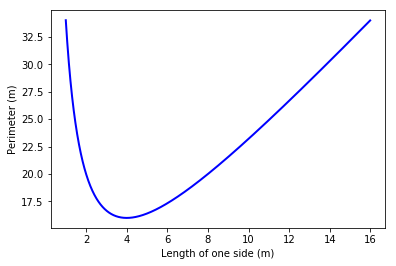

In [18]:
points = np.arange(1,16,0.01)
plot(points, [P(x) for x in points], c='b', lw=2)
xlabel('Length of one side (m)')
ylabel('Perimeter (m)');

Upon seeing this graph, I did not found it intuitive at all. However, upon closer inspection, we can see that for example at $L=4$ we have a square. And being a square, this gives us the shortest perimeter, as we can see in the graph. 

Another thing to notice is that when we have $L<1$, the perimeter starts to grow rapidly.

In [24]:
P(0.5)

65.0

In [25]:
P(0.25)

128.5

In [26]:
P(0.01)

3200.02

Thinking about it, it is a pretty obvious result, but not so obvious upon first sight. Because the rectangle is bounded with an area of $16m^2$, the other side of the rectangle has to become really big to meet this criteria if the length of the input side is very small.

Obviously this also works in the other direction:

In [94]:
P(32) == P(0.5) == 65

True

## Differentiation

To see how much the perimeter grows relatively to the input side length we give, we can differentiate the function with respect to $L$. Doing so will give:

$$\begin{align} P(L) &= \frac{2L^2+32}{L} \\ \frac{dP}{dL} &= \dfrac{L \cdot \dfrac{d(2L^2+32)}{dL} + (2L^2+32)\dfrac{d(L)}{dL}}{L^2} \\ \frac{dP}{dL} &= \frac{L\cdot(4L) + (2L^2+32)\cdot(1)}{L^2} \\ \frac{dP}{dL} &= \frac{4L^2+2L^2+32}{L^2} \\ \frac{dP}{dL} &= \frac{6L^2+32}{L^2}  \end{align}$$

If we implement $P'(L) = \dfrac{6L^2+32}{L^2}$:

In [27]:
def PPrime(L):
    return (6*L**2+32)/L**2

And plot it with $P(L)$:

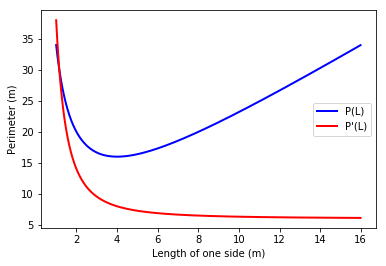

In [32]:
points = np.arange(1,16,0.01)
plot(points, [P(x) for x in points], c='b', lw=2)
plot(points, [PPrime(x) for x in points], c='r', lw=2)
xlabel('Length of one side (m)')
ylabel('Perimeter (m)')
legend(['P(L)', "P'(L)"]);

And if we take a closer look at $0<L<4$ on a logarithmic scale:

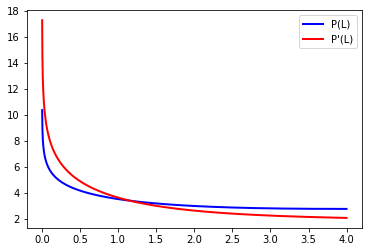

In [36]:
points = np.arange(0.001,4,0.001)
plot(points, [np.log(P(x)) for x in points], c='b', lw=2)
plot(points, [np.log(PPrime(x)) for x in points], c='r', lw=2)
legend(['P(L)', "P'(L)"]);

We can see that $P'(L)$ is causing $P(L)$ to grow really fast as we are starting to approach $L=0$. Now let's take the second derivative of $P(L)$:

$$\begin{align} \frac{dP}{dL} &= \frac{4L^2+32}{L^2} \\ \frac{d^2P}{dL^2} &= \dfrac{L^2 \dfrac{d(6L^2+32)}{dL}+(6L^2+32)\dfrac{d(L^2)}{dL}}{(L^2)^2} \\ \frac{d^2P}{dL^2} &= \frac{L^2(12L) + (6L^2+32)2L}{L^4} \\ \frac{d^2P}{dL^2} &= \frac{24L^3+62L}{L^4}\end{align}$$

If we implement $P''(L)=\dfrac{24L^3+62L}{L^4}$:

In [38]:
def PDoublePrime(L):
    return (24*L**3+62*L)/L**4

And plot it with $P(L)$, and $P'(L)$:

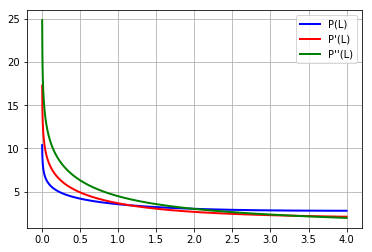

In [96]:
points = np.arange(0.001,4,0.001)
plot(points, [np.log(P(x)) for x in points], c='b', lw=2)
plot(points, [np.log(PPrime(x)) for x in points], c='r', lw=2)
plot(points, [np.log(PDoublePrime(x)) for x in points], c='green', lw=2)
grid()
legend(['P(L)', "P'(L)", "P''(L)"]);

We can see that $P''(L)$ is causing $P'(L)$ to grow really big. If we keep differentiating I think we will keep finding derivatives that are tending faster to infinity. This observation probably has a name but I am currently unaware of it.

## Infinite perimeter

We can see that when we let $L$ approach $0$, the perimeter becomes infinite. Thus, we come to the assertion that:

$$ \lim_{L\rightarrow 0} \frac{2L^2+32}{L} = \infty$$

which makes the perimeter infinitely long! The proof is rather easy if we look at the domain of $P(L)$, which is $\mathbb{R}\setminus {0}$, because it is a rational function it means that there is a vertical asymptote that tends to infinity as $L$ approaches $0$.

## We must go deeper

If we graph the functions over a greater interval, we can see this behaviour more clearly:

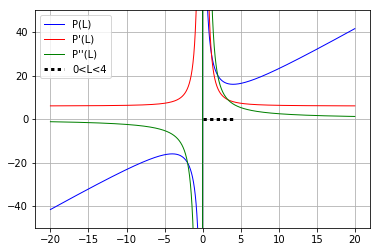

In [95]:
points = np.arange(-20,20, 0.01)
interval = np.arange(0,4, 0.01)
axes = plt.gca()
axes.set_ylim([-50,50])
plot(points, [P(x) for x in points], c='b', lw=1)
plot(points, [PPrime(x) for x in points], c='r', lw=1)
plot(points, [PDoublePrime(x) for x in points], c='green', lw=1);
plot(interval, np.zeros(len(interval)), c='black', ls='dotted', lw=3)
legend(['P(L)', "P'(L)", "P''(L)", '0<L<4'])
grid()

A cool observation is that $F''(L)$ has a horizontal asymptote on the horizontal axis because the degree of the nominator is $3$ and the degree of the denominator is $4$ (the largest power is in the denominator). 

Because of that the slope of $F'(L)$ will decrease at an infinitely small rate, and we can see that it's horizontal asymptote is at $6$ because we have $6L^2$ in the numerator and $L^2$ in the denominator. 

This horizontal asymptote causes that the value of $F'(L)$ is approaching a constant decreasement, which affects the slope of $F(L)$ and gives the oblique asymptote in $F(L)$.

If we apply long polynomial division to $\dfrac{2L^2+32}{L}$ we will get $2L$, and plotting this with $P(L)$:

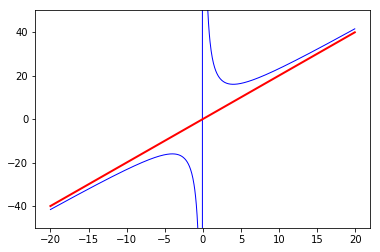

In [106]:
points = np.arange(-20,20, 0.05)
plot(points, [P(x) for x in points], c='b', lw=1)
plot(points, [2*x for x in points], c='r', lw=2)
axes = plt.gca()
axes.set_ylim([-50,50]);

which is the oblique asymptote!

## Continuing differentiation

The third derivative $\dfrac{d^3P}{dL^3}=\dfrac{168L^6+320L^4}{L^8}$ gives the graph:

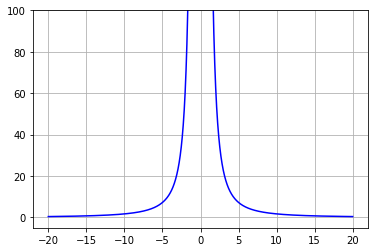

In [117]:
def PTriplePrime(L):
    return (168*L**6+320*L**4)/L**8

points = np.arange(-20,20, 0.01)
interval = np.arange(0,4, 0.01)
axes = plt.gca()
axes.set_ylim([-5,100])
plot(points, [PTriplePrime(x) for x in points], c='b')
grid()